In [129]:
from dotenv import load_dotenv
import os
import mysql.connector

# Load the .env file
load_dotenv('product_analytics.env')

# Get credentials from environment variables
DB_HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_NAME = os.getenv('DB_NAME')

# Connect to the database
connection = mysql.connector.connect(
    host=DB_HOST,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME
)

cursor = connection.cursor()
cursor.execute("SELECT DATABASE();")
print("Connected to:", cursor.fetchone())


Connected to: ('product_analytics',)


In [130]:
import pandas as pd
import numpy as np
from  datetime import timedelta
from  datetime import datetime

In [131]:
fintech_user_df = pd.read_sql("SELECT * FROM fintech_user;", connection)

digital_wallet_df = pd.read_sql("""
   SELECT 
        customer_id AS user_id,
        Location,
        Income_Level,
        Total_Transactions,
        Avg_Transaction_Value,
        Max_Transaction_Value,
        Min_Transaction_Value,
        Total_Spent,
        Active_Days,
        Last_Transaction_Days_Ago,
        Loyalty_Points_Earned,
        Referral_Count,
        Cashback_Received,
        App_Usage_Frequency,
        Preferred_Payment_Method,
        Support_Tickets_Raised,
        Issue_Resolution_Time,
        Customer_Satisfaction_Score,
        LTV
   FROM digital_wallet;
""", connection)

loan_df = pd.read_sql("""
    SELECT 
        loan_id,
        loan_status,
        loan_amount,
        state,
        funded_amount,
        term,
        int_rate,
        installment,
        grade,
        issue_date,
        pymnt_plan,
        type,
        purpose,
        description,
        notes
    FROM loan;
""", connection)

loan_region_df = pd.read_sql("SELECT loan_id, loan_amount, region FROM loan_with_region;", connection)

loan_count_df = pd.read_sql("SELECT * FROM loan_count_by_year;", connection)

customer_df = pd.read_sql("""
    SELECT 
        customer_id AS user_id,
        emp_title,
        emp_length,
        home_ownership,
        annual_inc,
        annual_inc_joint,
        verification_status,
        zip_code,
        addr_state,
        avg_cur_bal,
        Tot_cur_bal
    FROM customer;
""", connection)

loan_purpose_df = pd.read_sql("SELECT Purpose FROM loan_purpose;", connection)


C:\Users\lee\AppData\Local\Temp\ipykernel_12964\1757036784.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fintech_user_df = pd.read_sql("SELECT * FROM fintech_user;", connection)
C:\Users\lee\AppData\Local\Temp\ipykernel_12964\1757036784.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  digital_wallet_df = pd.read_sql("""
C:\Users\lee\AppData\Local\Temp\ipykernel_12964\1757036784.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  loan_df = pd.read_sql("""
C:\Users\lee\AppData\Local\Temp\ipykernel_12964\1757036784.p

In [132]:
print("Fintech_user missing values:")
print(fintech_user_df.isnull().sum())

print("Loan missing values:")
print(loan_df.isnull().sum())

print("Digital_wallet missing values:")
print(digital_wallet_df.isnull().sum())

print("Customer missing values:")
print(customer_df.isnull().sum())


Fintech_user missing values:
user_id                    0
churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64
Loan missing values:
loan_id          0
loan_status      0


In [133]:
print("Fintech_user count duplicates:")
print(fintech_user_df.duplicated(subset='user_id').sum())

print("Loan count duplicates:")
print(loan_df.duplicated(subset='loan_id').sum())

print("Digital_wallet count duplicates:")
print(digital_wallet_df.duplicated(subset='user_id').sum())

print("Customer count duplicates:")
print(customer_df.duplicated(subset='user_id').sum())
      

Fintech_user count duplicates:
0
Loan count duplicates:
0
Digital_wallet count duplicates:
0
Customer count duplicates:
0


In [134]:
print("Fintech_user duplicate rows:")
print(fintech_user_df.duplicated(subset='user_id',keep=False))
                          
print("Loan duplicate rows:")
print(loan_df.duplicated(subset='loan_id',keep=False))

print("Digital_wallet count duplicates:")
print(digital_wallet_df.duplicated(subset='user_id',keep=False))

print("Customer count duplicates:")
print(customer_df.duplicated(subset='user_id',keep=False))
      

Fintech_user duplicate rows:
0        False
1        False
2        False
3        False
4        False
         ...  
16242    False
16243    False
16244    False
16245    False
16246    False
Length: 16247, dtype: bool
Loan duplicate rows:
0         False
1         False
2         False
3         False
4         False
          ...  
270294    False
270295    False
270296    False
270297    False
270298    False
Length: 270299, dtype: bool
Digital_wallet count duplicates:
0       False
1       False
2       False
3       False
4       False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Length: 7000, dtype: bool
Customer count duplicates:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool


In [135]:
tables = ['fintech_user', 'digital_wallet', 'loan', 'customer']

def inspect_table(table_name, connection):
    df = pd.read_sql(f"SELECT * FROM {table_name};", connection)

    print(f"\n==================== {table_name.upper()} ====================")
    print("\nSchema (columns, dtypes):")
    print(df.info())

    print("\nPreview (first 5 rows):")
    print(df.head())

    print("\nSummary statistics:")
    print(df.describe(include='all'))

    print("\nMissing values:")
    print(df.isnull().sum())

    return df


dfs = {name: inspect_table(name, connection) for name in tables}



C:\Users\lee\AppData\Local\Temp\ipykernel_12964\610390106.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table_name};", connection)



==================== FINTECH_USER ====================

Schema (columns, dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16247 entries, 0 to 16246
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  16247 non-null  object 
 1   churn                    16247 non-null  int64  
 2   age                      16247 non-null  int64  
 3   housing                  16247 non-null  object 
 4   credit_score             16247 non-null  int64  
 5   deposits                 16247 non-null  float64
 6   withdrawal               16247 non-null  float64
 7   purchases_partners       16247 non-null  int64  
 8   purchases                16247 non-null  int64  
 9   cc_taken                 16247 non-null  int64  
 10  cc_recommended           16247 non-null  int64  
 11  cc_disliked              16247 non-null  int64  
 12  cc_liked                 16247 non-null  int64 

C:\Users\lee\AppData\Local\Temp\ipykernel_12964\610390106.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table_name};", connection)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

C:\Users\lee\AppData\Local\Temp\ipykernel_12964\610390106.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table_name};", connection)



==================== LOAN ====================

Schema (columns, dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270299 entries, 0 to 270298
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   loan_id        270299 non-null  int64  
 1   loan_status    270299 non-null  object 
 2   loan_amount    270299 non-null  int64  
 3   state          270299 non-null  object 
 4   funded_amount  270299 non-null  int64  
 5   term           270299 non-null  object 
 6   int_rate       270299 non-null  object 
 7   installment    270299 non-null  float64
 8   grade          270299 non-null  object 
 9   issue_date     270299 non-null  object 
 10  pymnt_plan     270299 non-null  object 
 11  type           270299 non-null  object 
 12  purpose        270299 non-null  object 
 13  description    270299 non-null  object 
 14  notes          270299 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory u

C:\Users\lee\AppData\Local\Temp\ipykernel_12964\610390106.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table_name};", connection)


In [136]:
fintech_user_df['user_id'] = fintech_user_df['user_id'].astype(str)
digital_wallet_df['Customer_ID'] = digital_wallet_df['user_id'].astype(str)
customer_df['customer_id'] = customer_df['user_id'].astype(str)
loan_df['loan_id'] = loan_df['loan_id'].astype(str)


In [137]:
from IPython.display import display

print("Fintech_user stats:")
display(fintech_user_df.describe(include='all'))

print("Digital Wallet stats:")
display(digital_wallet_df.describe(include='all'))

print("Loan stats:")
display(loan_df.describe(include='all'))

print("Customer stats:")
display(customer_df.describe(include='all'))



Fintech_user stats:


,user_id,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,16247,16247.000000,16247.000000,16247,16247.000000,16247.000000,16247.000000,16247.000000,16247.000000,16247.000000,...,16247.000000,16247.000000,16247.000000,16247.000000,16247,16247.000000,16247.000000,16247.000000,16247.000000,16247.000000
unique,16247,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
top,1,NaN,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Leo,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,8213,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1445,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.436881,32.085431,NaN,542.970518,4.348864,0.395950,34.749615,4.259986,0.097803,...,0.000985,0.020865,0.022096,0.004062,NaN,0.177571,0.021296,32.270327,1.125166,0.386841
std,NaN,0.496015,9.393859,NaN,61.150101,10.289723,1.200964,45.684046,10.086472,0.515284,...,0.031367,0.142938,0.147002,0.063608,NaN,0.382163,0.144374,21.653197,0.711305,0.487042
min,NaN,0.000000,17.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,0.000000,25.000000,NaN,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,13.000000,0.530000,0.000000
50%,NaN,0.000000,30.000000,NaN,542.000000,0.000000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,30.000000,1.030000,0.000000
75%,NaN,1.000000,37.000000,NaN,578.000000,3.000000,0.000000,55.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,52.000000,1.730000,1.000000


Digital Wallet stats:


,user_id,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Customer_ID
count,7000,7000,7000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000,7000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000
unique,7000,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,7000
top,cust_0000,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daily,UPI,NaN,NaN,NaN,NaN,cust_0000
freq,1,2368,2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2346,1791,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,NaN,NaN,10.017571,36.528007,5.479000,5.119197e+05,NaN
std,NaN,NaN,NaN,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,NaN,NaN,6.037067,20.389399,2.860197,4.390551e+05,NaN
min,NaN,NaN,NaN,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,NaN,NaN,0.000000,1.019853,1.000000,3.770495e+03,NaN
25%,NaN,NaN,NaN,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,NaN,NaN,5.000000,19.127302,3.000000,1.482058e+05,NaN
50%,NaN,NaN,NaN,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,NaN,NaN,10.000000,36.257396,5.000000,3.878180e+05,NaN
75%,NaN,NaN,NaN,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,NaN,NaN,15.000000,54.068594,8.000000,7.748578e+05,NaN


Loan stats:


,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,installment,grade,issue_date,pymnt_plan,type,purpose,description,notes
count,270299,270299,270299.000000,270299,270299.000000,270299,270299,270299.000000,270299,270299,270299,270299,270299,270299,270299
unique,270299,7,NaN,51,NaN,2,27,NaN,7,89,2,5,13,5632,1
top,1079,Current,NaN,CA,NaN,36 months,8%,NaN,B,01/03/2016,FALSE,Individual,debt_consolidation,Debt consolidation,desc
freq,1,170461,NaN,37024,NaN,189772,24569,NaN,79072,6353,270259,169493,152285,143251,270299
mean,NaN,NaN,15412.829496,NaN,15412.829496,NaN,NaN,453.919176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9459.781419,NaN,9459.781419,NaN,NaN,272.337511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1000.000000,NaN,1000.000000,NaN,NaN,29.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,8000.000000,NaN,8000.000000,NaN,NaN,256.040010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,13200.000000,NaN,13200.000000,NaN,NaN,383.959990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,20300.000000,NaN,20300.000000,NaN,NaN,605.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Customer stats:


,user_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,Tot_cur_bal,customer_id
count,12,12,12,12,12.000000,12.000000,12,12,12,12.000000,12.000000,12
unique,12,1,1,3,NaN,NaN,3,5,1,NaN,NaN,12
top,BQFT_009,,n/a,MORTGAGE,NaN,NaN,Verified,010xx,MA,NaN,NaN,BQFT_009
freq,1,12,12,8,NaN,NaN,5,7,12,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,48986.136667,108177.303333,NaN,NaN,NaN,10674.250000,103256.916667,NaN
std,NaN,NaN,NaN,NaN,24695.296255,52885.675183,NaN,NaN,NaN,10666.099245,94655.962092,NaN
min,NaN,NaN,NaN,NaN,25000.000000,49331.640000,NaN,NaN,NaN,8.000000,30.000000,NaN
25%,NaN,NaN,NaN,NaN,31993.410000,78500.000000,NaN,NaN,NaN,2175.250000,24991.000000,NaN
50%,NaN,NaN,NaN,NaN,42000.000000,102000.000000,NaN,NaN,NaN,7925.500000,68456.000000,NaN
75%,NaN,NaN,NaN,NaN,51340.000000,123500.000000,NaN,NaN,NaN,16194.250000,208341.250000,NaN


In [138]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import joblib 


(16247, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16247 entries, 0 to 16246
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  16247 non-null  object 
 1   churn                    16247 non-null  int64  
 2   age                      16247 non-null  int64  
 3   housing                  16247 non-null  object 
 4   credit_score             16247 non-null  int64  
 5   deposits                 16247 non-null  float64
 6   withdrawal               16247 non-null  float64
 7   purchases_partners       16247 non-null  int64  
 8   purchases                16247 non-null  int64  
 9   cc_taken                 16247 non-null  int64  
 10  cc_recommended           16247 non-null  int64  
 11  cc_disliked              16247 non-null  int64  
 12  cc_liked                 16247 non-null  int64  
 13  cc_application_begin     16247 non-null  int64  
 14  app_downlo

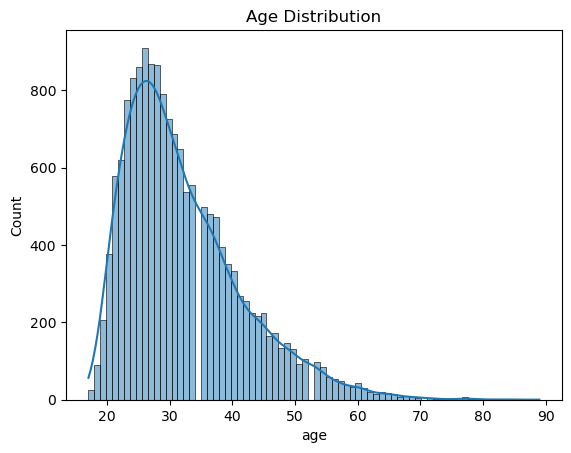

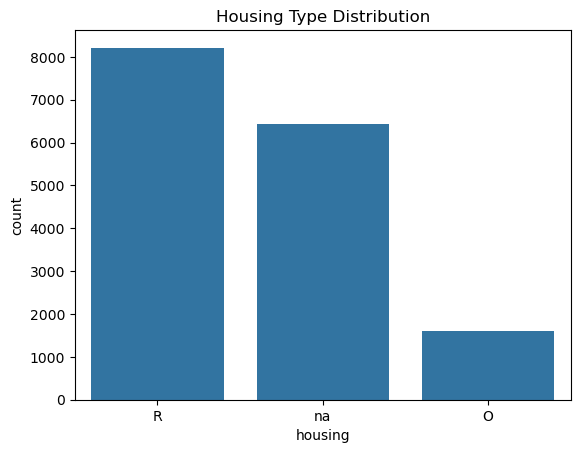

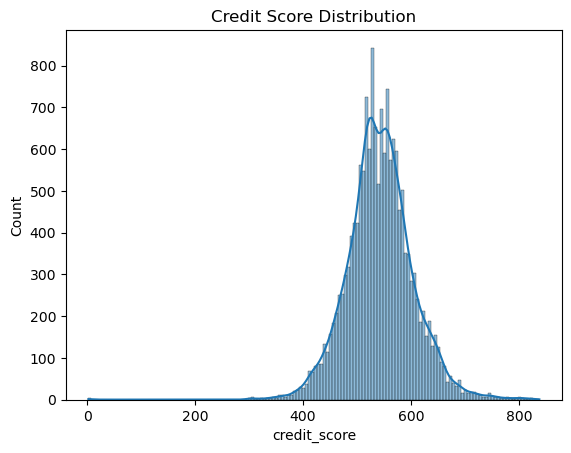

In [139]:
print(fintech_user_df.shape)
print(fintech_user_df.info())
print(fintech_user_df.describe())

sns.histplot(fintech_user_df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=fintech_user_df, x='housing')
plt.title("Housing Type Distribution")
plt.show()

sns.histplot(fintech_user_df['credit_score'], kde=True)
plt.title("Credit Score Distribution")
plt.show()


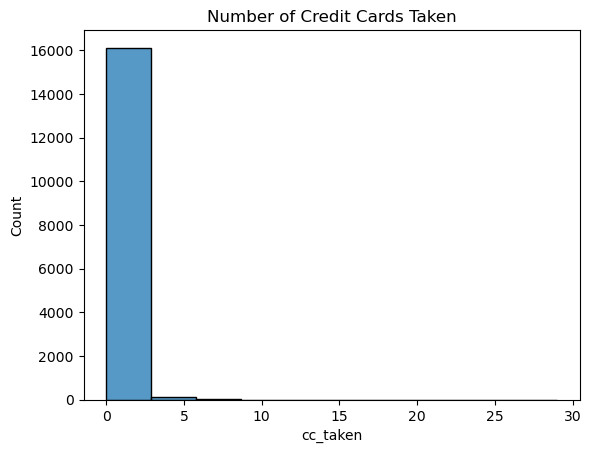

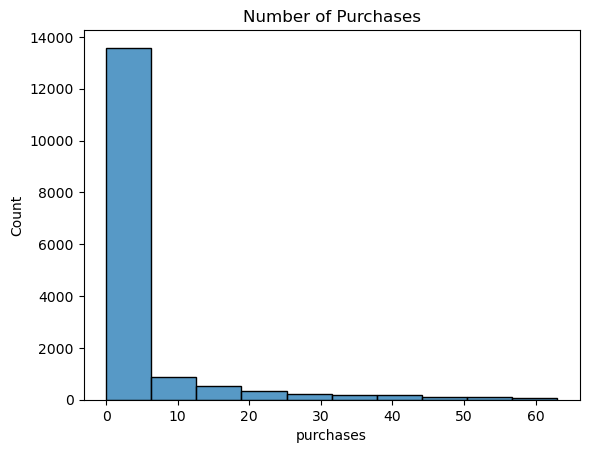

In [140]:
usage_flags = ['ios_user', 'android_user', 'web_user']
fintech_user_df[usage_flags].sum()

sns.histplot(fintech_user_df['cc_taken'], bins=10)
plt.title("Number of Credit Cards Taken")
plt.show()

sns.histplot(fintech_user_df['purchases'], bins=10)
plt.title("Number of Purchases")
plt.show()


In [141]:
loan_df['int_rate'] = loan_df['int_rate'].astype(str).str.replace('%','', regex=True).astype(float)
loan_df['issue_date'] = pd.to_datetime(loan_df['issue_date'])

loan_agg_overall = pd.DataFrame({
    'total_loans': [loan_df['loan_id'].count()],
    'total_loan_amount': [loan_df['loan_amount'].sum()],
    'avg_loan_amount': [loan_df['loan_amount'].mean()],
    'total_funded': [loan_df['funded_amount'].sum()],
    'avg_interest': [loan_df['int_rate'].mean()],
    'loans_repaid': [(loan_df['loan_status'] == "Fully Paid").sum()],
    'loans_defaulted': [(loan_df['loan_status'] == "Default").sum()]
})

print(loan_agg_overall)


   total_loans  total_loan_amount  avg_loan_amount  total_funded  \
0       270299         4166072400     15412.829496    4166072400   

   avg_interest  loans_repaid  loans_defaulted  
0     13.028332         76361               12  


In [142]:
status_metrics = loan_df.groupby('loan_status').agg(
    count=('loan_id','count'),
    total_amount=('loan_amount','sum'),
    avg_amount=('loan_amount','mean'),
    avg_interest=('int_rate','mean')
).reset_index()
print(status_metrics)

grade_metrics = loan_df.groupby('grade').agg(
    count=('loan_id','count'),
    total_amount=('loan_amount','sum'),
    avg_amount=('loan_amount','mean'),
    avg_interest=('int_rate','mean')
).reset_index()
print(grade_metrics)

purpose_metrics = loan_df.groupby('purpose').agg(
    count=('loan_id','count'),
    total_amount=('loan_amount','sum'),
    avg_amount=('loan_amount','mean')
).reset_index()
print(purpose_metrics)


          loan_status   count  total_amount    avg_amount  avg_interest
0         Charged Off   17851     279474150  15655.938043     15.804997
1             Current  170461    2707434000  15883.011363     12.768786
2             Default      12        195275  16272.916667     18.500000
3          Fully Paid   76361    1085519400  14215.625778     12.748052
4     In Grace Period    1638      27581325  16838.415751     15.233211
5   Late (16-30 days)     802      13021275  16236.003741     15.694514
6  Late (31-120 days)    3174      52846975  16649.960618     16.261815
  grade  count  total_amount    avg_amount  avg_interest
0     A  57871     885852250  15307.360336      7.159890
1     B  79072    1172718975  14831.027102     10.744827
2     C  75840    1160587550  15303.105881     14.400158
3     D  38876     612751850  15761.700021     18.843914
4     E  13429     233390875  17379.616874     21.976394
5     F   4005      76486600  19097.777778     25.829713
6     G   1206      24284

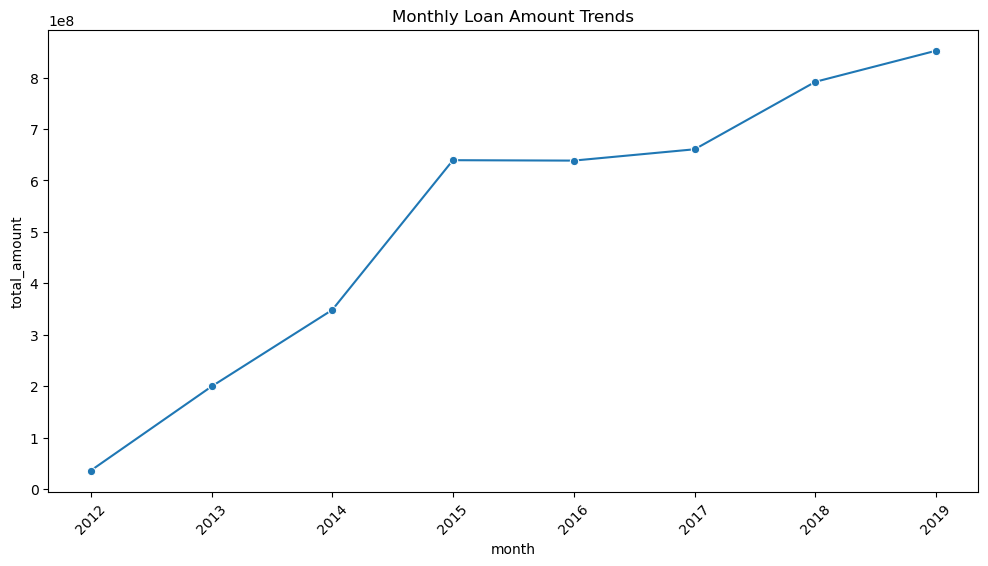

In [143]:

loan_df['issue_date'] = pd.to_datetime(loan_df['issue_date'])

loan_df['month'] = loan_df['issue_date'].values.astype('datetime64[M]')

monthly_metrics = loan_df.groupby('month').agg(
    total_loans=('loan_id','count'),
    total_amount=('loan_amount','sum'),
    avg_interest=('int_rate','mean')
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_metrics, x='month', y='total_amount', marker='o')
plt.title("Monthly Loan Amount Trends")
plt.xticks(rotation=45)
plt.show()



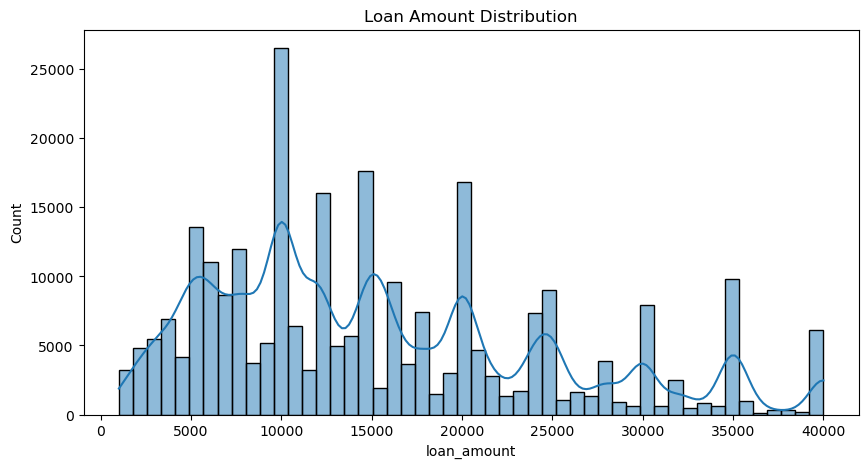

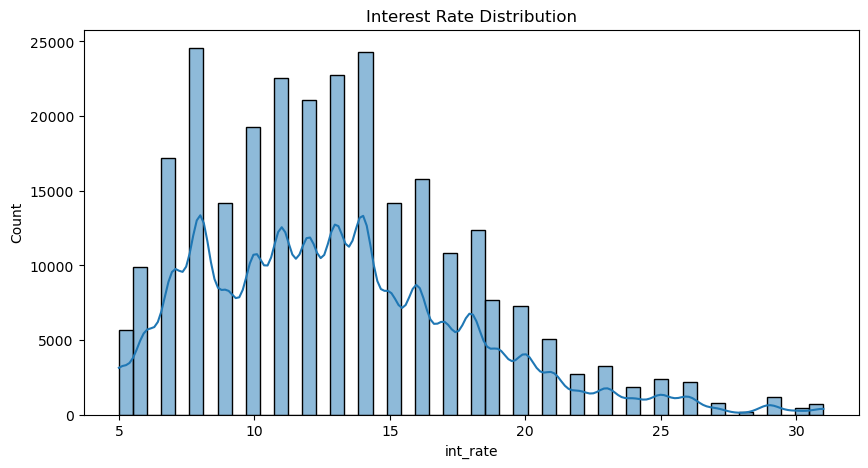

In [144]:

plt.figure(figsize=(10,5))
sns.histplot(loan_df['loan_amount'], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(loan_df['int_rate'], bins=50, kde=True)
plt.title("Interest Rate Distribution")
plt.show()


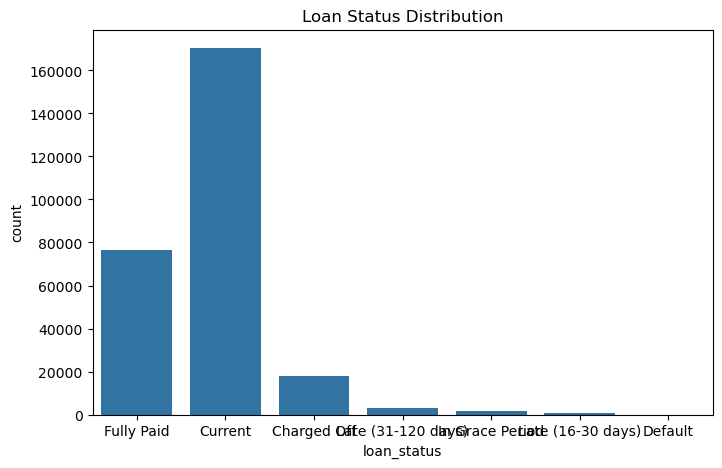

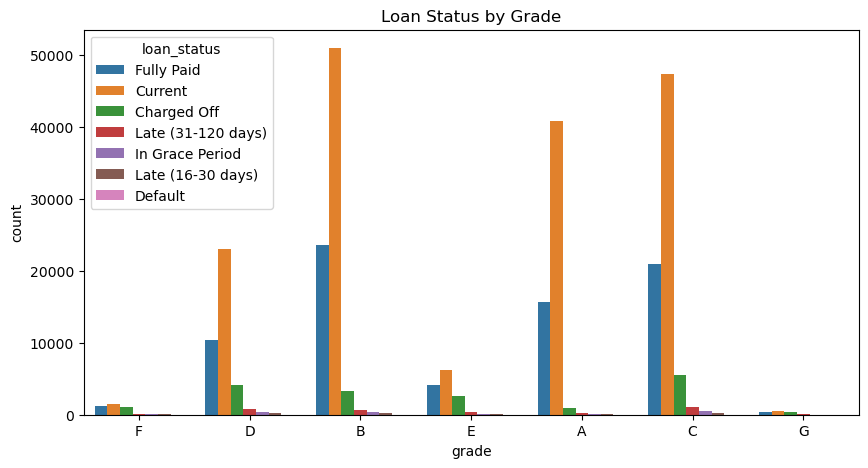

In [145]:
plt.figure(figsize=(8,5))
sns.countplot(data=loan_df, x='loan_status')
plt.title("Loan Status Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=loan_df, x='grade', hue='loan_status')
plt.title("Loan Status by Grade")
plt.show()


In [146]:
loan_df['repaid_flag'] = (loan_df['loan_status'] == "Fully Paid").astype(int)
loan_df['default_flag'] = (loan_df['loan_status'] == "Default").astype(int)

loan_df['term_months'] = (
    loan_df['term']
    .str.extract(r'(\d+)')      
    .astype(float)             
)

loan_df['term_months'] = loan_df['term_months'].fillna(0)


loan_df['funded_ratio'] = loan_df.apply(
    lambda row: row['funded_amount'] / row['loan_amount']
    if row['loan_amount'] not in [0, None] else 0,
    axis=1
)

loan_df['funded_ratio'] = loan_df['funded_ratio'].clip(upper=1)



In [147]:
datasets = {
    "fintech_user_df": fintech_user_df,
    "digital_wallet_df": digital_wallet_df,
    "loan_df": loan_df,
    "loan_region_df": loan_region_df,
    "loan_count_df": loan_count_df,
    "customer_df": customer_df,
    "loan_purpose_df": loan_purpose_df
}

for name, df in datasets.items():
    print(f"{name:20s} rows: {df.shape[0]:7d}  cols: {df.shape[1]:3d}")
    display(df.head(1))
    print()


if 'user_id' not in digital_wallet_df.columns:
    # user had Customer_ID earlier; we already aliased in SQL, but check
    if 'Customer_ID' in digital_wallet_df.columns:
        digital_wallet_df = digital_wallet_df.rename(columns={'Customer_ID':'user_id'})
    elif 'customer_id' in digital_wallet_df.columns:
        digital_wallet_df = digital_wallet_df.rename(columns={'customer_id':'user_id'})

if 'user_id' not in customer_df.columns and 'customer_id' in customer_df.columns:
    customer_df = customer_df.rename(columns={'customer_id':'user_id'})

print("user id columns standardized where present")


fintech_user_df      rows:   16247  cols:  31


,user_id,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21,R,577,48.0,4.0,52,45,0,...,0,0,0,0,Pisces,0,0,56.0,1.87,0



digital_wallet_df    rows:    7000  cols:  20


,user_id,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Customer_ID
0,cust_0000,Urban,Low,192,16736.384023,60216.83451,6525.814861,3.213386e+06,140,209,2114,25,2224.01214,Monthly,Debit Card,3,61.56859,1,327954.567175,cust_0000



loan_df              rows:  270299  cols:  20


,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,installment,grade,issue_date,pymnt_plan,type,purpose,description,notes,month,repaid_flag,default_flag,term_months,funded_ratio
0,1079,Fully Paid,1000,MI,1000,36 months,23.0,38.689999,F,2013-01-06,FALSE,INDIVIDUAL,moving,Moving loan,desc,2013-01-01,1,0,36.0,1.0



loan_region_df       rows:     532  cols:   3


,loan_id,loan_amount,region
0,161773,16000.0,West



loan_count_df        rows:       8  cols:   2


,issue_year,loan_count
0,2012,2594



customer_df          rows:      12  cols:  12


,user_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,Tot_cur_bal,customer_id
0,BQFT_009,,n/a,OWN,30000.0,118000.0,Verified,010xx,MA,8.0,30.0,BQFT_009



loan_purpose_df      rows:      13  cols:   1


,Purpose
0,other



user id columns standardized where present


In [148]:
def try_parse_dates(df):
    for c in df.columns:
        if df[c].dtype == object:
            # try parsing up to 5 non-null values quickly to infer
            sample = df[c].dropna().astype(str).head(5).tolist()
            if len(sample) == 0:
                continue
            # crude heuristics for date-like strings
            if any(('-' in s and len(s) >= 8) or ('/' in s and len(s) >= 8) or ('T' in s) for s in sample):
                try:
                    df[c] = pd.to_datetime(df[c], errors='raise', infer_datetime_format=True)
                    print(f"parsed column {c} to datetime")
                except Exception:
                    pass
    return df

fintech_user_df = try_parse_dates(fintech_user_df)
digital_wallet_df = try_parse_dates(digital_wallet_df)
loan_df = try_parse_dates(loan_df)
customer_df = try_parse_dates(customer_df)

numeric_candidates = [
    ('fintech_user_df', fintech_user_df, ['age','credit_score','deposits','withdrawal','rewards_earned','reward_rate']),
    ('digital_wallet_df', digital_wallet_df, ['Age','Income_Level','Total_Transactions','Avg_Transaction_Value','Max_Transaction_Value','Min_Transaction_Value','Total_Spent','Active_Days','Last_Transaction_Days_Ago','Loyalty_Points_Earned','Referral_Count','Cashback_Received','App_Usage_Frequency','Support_Tickets_Raised','Issue_Resolution_Time','Customer_Satisfaction_Score','LTV']),
    ('loan_df', loan_df, ['loan_amount','funded_amount','term','int_rate','installment']),
    ('customer_df', customer_df, ['annual_inc','annual_inc_joint','avg_cur_bal','Tot_cur_bal'])
]

for name, df, cols in numeric_candidates:
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')


In [149]:
# Track DAU and MAU
def normalize_event_time(x, reference_date=None):
    """
    Convert various event_time formats to date.
    - int: treated as 'days ago' from reference_date (or today if None)
    - pd.Timestamp: extract date
    - str: attempt parsing
    """
    if reference_date is None:
        reference_date = datetime.today()
        
    if isinstance(x, int):
        return (reference_date - timedelta(days=x)).date()
    elif isinstance(x, pd.Timestamp):
        return x.date()
    else:
        try:
            return pd.to_datetime(x, errors='coerce').date()
        except:
            return pd.NaT


events = []

if 'Last_Transaction_Days_Ago' in digital_wallet_df.columns:
    tmp = digital_wallet_df[['user_id', 'Last_Transaction_Days_Ago']].dropna()
    tmp = tmp.rename(columns={'Last_Transaction_Days_Ago':'event_time'})
    tmp['source'] = 'digital_wallet'
    events.append(tmp[['user_id','event_time','source']])

if 'app_downloaded' in fintech_user_df.columns:
    tmp = fintech_user_df[['user_id', 'app_downloaded']].dropna()
    tmp = tmp.rename(columns={'app_downloaded':'event_time'})
    tmp['source'] = 'fintech_user'
    events.append(tmp[['user_id','event_time','source']])

if 'issue_date' in loan_df.columns:
    tmp = loan_df[['issue_date']].dropna().copy()
    tmp = tmp.rename(columns={'issue_date':'event_time'})
    tmp['user_id'] = np.nan
    tmp['source'] = 'loan'
    events.append(tmp[['user_id','event_time','source']])

events_df = pd.concat(events, ignore_index=True)

events_df['event_date'] = events_df['event_time'].apply(normalize_event_time)

dau_user = events_df.dropna(subset=['user_id']).groupby('event_date')['user_id'].nunique().rename('dau_users').reset_index()
dau_events = events_df[events_df['user_id'].isna()].groupby('event_date').size().rename('dau_events').reset_index()
dau = pd.merge(dau_user, dau_events, on='event_date', how='outer').fillna(0)
dau['dau_total'] = dau['dau_users'] + dau['dau_events']
dau = dau.sort_values('event_date')

user_events = events_df.dropna(subset=['user_id']).copy()
user_events['period_month'] = pd.to_datetime(user_events['event_date']).dt.to_period('M')
mau = user_events.groupby('period_month')['user_id'].nunique().rename('mau_users').reset_index()

print("DAU/MAU computation successful!")



DAU/MAU computation successful!


In [150]:
#3.  Churn analysis 

if 'churn' not in fintech_user_df.columns:
    print("No churn column found in fintech_user_df. Skipping churn analysis.")
else:
    fintech_user_df['churn_flag'] = pd.to_numeric(fintech_user_df['churn'], errors='coerce').fillna(0).astype(int)

    if 'age' in fintech_user_df.columns:
        fintech_user_df['age_bin'] = pd.cut(
            fintech_user_df['age'],
            bins=[0,18,25,34,44,54,64,120],
            labels=['<18','18-24','25-34','35-44','45-54','55-64','65+']
        )
    else:
        fintech_user_df['age_bin'] = 'unknown'

    if 'credit_score' in fintech_user_df.columns:
        fintech_user_df['credit_bucket'] = pd.cut(
            fintech_user_df['credit_score'],
            bins=[-1,300,580,670,740,800,1000],
            labels=['Very Poor','Poor','Fair','Good','Very Good','Excellent']
        )
    else:
        fintech_user_df['credit_bucket'] = 'unknown'

    seg_cols = [c for c in ['age_bin','credit_bucket','app_web_user','web_user','ios_user','android_user',
                            'is_referred','housing','payment_type','zodiac_sign'] if c in fintech_user_df.columns]

    churn_summary = {}
    for c in seg_cols:
        t = fintech_user_df.groupby(c).agg(
            user=('user_id','nunique'),   # unique users
            churns=('churn_flag','sum')   # total churns
        ).reset_index()
        t['churn_rate'] = (t['churns'] / t['user']).fillna(0)
        churn_summary[c] = t.sort_values('user', ascending=False)

        print(f"\nChurn summary for {c}:\n")
        print(churn_summary[c].head(10).to_string(index=False))

    total_users = fintech_user_df['user_id'].nunique()
    total_churns = fintech_user_df['churn_flag'].sum()
    overall_churn_rate = total_churns / total_users if total_users > 0 else 0

    print("\nOverall churn totals:")
    print(f"total_users: {total_users}")
    print(f"total_churns: {total_churns}")
    print(f"overall_churn_rate: {overall_churn_rate:.4f}")




Churn summary for age_bin:

age_bin  user  churns  churn_rate
  25-34  6588    2923    0.443685
  18-24  4252    2008    0.472248
  35-44  3496    1452    0.415332
  45-54  1350     501    0.371111
  55-64   358     123    0.343575
    <18   115      50    0.434783
    65+    88      41    0.465909

Churn summary for credit_bucket:

credit_bucket  user  churns  churn_rate
         Poor 12382    5787    0.467372
         Fair  3484    1178    0.338117
         Good   298     100    0.335570
    Very Good    62      24    0.387097
    Excellent    17       7    0.411765
    Very Poor     4       2    0.500000

Churn summary for app_web_user:

 app_web_user  user  churns  churn_rate
            1 10253    4573    0.446016
            0  5994    2525    0.421255

Churn summary for web_user:

 web_user  user  churns  churn_rate
        1 10255    4574    0.446026
        0  5992    2524    0.421228

Churn summary for ios_user:

 ios_user  user  churns  churn_rate
        0  9492    4008   

In [151]:
fintech_user_df.to_csv("churn.csv", index=False)

for seg, df in churn_summary.items():
    filename = f"churn_summary_{seg}.csv"
    df.to_csv(filename, index=False)
    print(f"Saved {filename}")

overall_metrics = pd.DataFrame([{
    'total_users': total_users,
    'total_churns': total_churns,
    'overall_churn_rate': overall_churn_rate
}])
overall_metrics.to_csv("churn_summary_overall.csv", index=False)
print("Saved overall churn metrics to churn_summary_overall.csv")



Saved churn_summary_age_bin.csv
Saved churn_summary_credit_bucket.csv
Saved churn_summary_app_web_user.csv
Saved churn_summary_web_user.csv
Saved churn_summary_ios_user.csv
Saved churn_summary_android_user.csv
Saved churn_summary_is_referred.csv
Saved churn_summary_housing.csv
Saved churn_summary_payment_type.csv
Saved churn_summary_zodiac_sign.csv
Saved overall churn metrics to churn_summary_overall.csv


In [152]:

android_df = churn_summary['android_user'].rename(columns={
    'user': 'user_android',
    'churns': 'churns_android',
    'churn_rate': 'churn_rate_android'
})

ios_df = churn_summary['ios_user'].rename(columns={
    'user': 'user_ios',
    'churns': 'churns_ios',
    'churn_rate': 'churn_rate_ios'
})

appweb_df = churn_summary['app_web_user'].rename(columns={
    'user': 'user_app_web',
    'churns': 'churns_app_web',
    'churn_rate': 'churn_rate_app_web'
})

merged_platform = android_df.merge(ios_df, left_on='android_user', right_on='ios_user', how='outer')
merged_platform = merged_platform.merge(appweb_df, left_on='android_user', right_on='app_web_user', how='outer')

merged_platform = merged_platform.drop(columns=['ios_user', 'app_web_user'])

merged_platform.to_csv("churn_platform_usage.csv", index=False)
print("Saved churn_platform_usage.csv")


Saved churn_platform_usage.csv


In [153]:
events = []

dw_event_cols = [c for c in digital_wallet_df.columns if 'tx' in c.lower() or 'time' in c.lower()]
if dw_event_cols:
    col = dw_event_cols[0]
    tmp = digital_wallet_df[['user_id', col]].dropna().rename(columns={col: 'event_time'})
    tmp['source'] = 'digital_wallet'
    events.append(tmp[['user_id','event_time','source']])
    print("Using digital_wallet event column for DAU/MAU:", col)

fu_event_cols = [c for c in fintech_user_df.columns if 'downloaded' in c.lower() or 'reg' in c.lower() or 'time' in c.lower()]
if fu_event_cols:
    col = fu_event_cols[0]
    tmp = fintech_user_df[['user_id', col]].dropna().rename(columns={col:'event_time'})
    tmp['source'] = 'fintech_user'
    events.append(tmp[['user_id','event_time','source']])
    print("Using fintech_user event column for DAU/MAU:", col)

if 'issue_date' in loan_df.columns:
    tmp = loan_df[['issue_date']].dropna().rename(columns={'issue_date':'event_time'})
    tmp['user_id'] = np.nan
    tmp['source'] = 'loan'
    events.append(tmp[['user_id','event_time','source']])
    print("Using loan.issue_date as fallback event column")

events_df = pd.concat(events, ignore_index=True)

events_df.head()


Using digital_wallet event column for DAU/MAU: Issue_Resolution_Time
Using fintech_user event column for DAU/MAU: app_downloaded
Using loan.issue_date as fallback event column


,user_id,event_time,source
0,cust_0000,61.56859,digital_wallet
1,cust_0001,60.392889,digital_wallet
2,cust_0002,45.305579,digital_wallet
3,cust_0003,22.030191,digital_wallet
4,cust_0004,20.634723,digital_wallet


In [154]:
def safe_to_datetime(x):
    return pd.to_datetime(x, errors='coerce')

events_df['event_time'] = safe_to_datetime(events_df['event_time'])
events_df = events_df.dropna(subset=['event_time'])
events_df['event_date'] = events_df['event_time'].dt.date

events_df.head()



,user_id,event_time,source,event_date
23247,NaN,2013-01-06,loan,2013-01-06
23248,NaN,2014-01-09,loan,2014-01-09
23249,NaN,2012-01-10,loan,2012-01-10
23250,NaN,2014-01-12,loan,2014-01-12
23251,NaN,2013-01-01,loan,2013-01-01


In [155]:
events_df = events_df[events_df['event_date'] > pd.Timestamp('2000-01-01').date()]



In [156]:
dau = (
    events_df.groupby('event_date')
    .size()  # counts all events per day
    .reset_index(name='dau_total')
    .sort_values('event_date')
)

print(dau.to_string(index=False))

dau.to_csv('dau_by_date.csv', index=False)


event_date  dau_total
2012-01-08         81
2012-01-09        645
2012-01-10        628
2012-01-11        660
2012-01-12        580
2013-01-01        683
2013-01-02        747
2013-01-03        770
2013-01-04        936
2013-01-05       1011
2013-01-06       1076
2013-01-07       1181
2013-01-08       1322
2013-01-09       1325
2013-01-10       1426
2013-01-11       1483
2013-01-12       1500
2014-01-01       1564
2014-01-02       1578
2014-01-03       1568
2014-01-04       1856
2014-01-05       1952
2014-01-06       1750
2014-01-07       2896
2014-01-08       1860
2014-01-09       1138
2014-01-10       3839
2014-01-11       2460
2014-01-12        992
2015-01-01       3482
2015-01-02       2392
2015-01-03       2519
2015-01-04       3518
2015-01-05       3131
2015-01-06       2886
2015-01-07       4505
2015-01-08       3506
2015-01-09       2765
2015-01-10       5000
2015-01-11       3732
2015-01-12       4483
2016-01-01       3177
2016-01-02       3935
2016-01-03       6353
2016-01-04

In [157]:
dau = (
    events_df.dropna(subset=['user_id'])
    .groupby('event_date')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id':'dau_total'})
    .sort_values('event_date')
)



In [158]:
dau_user = events_df.dropna(subset=['user_id']).groupby('event_date')['user_id'].nunique().rename('dau_users').reset_index()
dau_events = events_df[events_df['user_id'].isna()].groupby('event_date').size().rename('dau_events').reset_index()
dau = pd.merge(dau_user, dau_events, on='event_date', how='outer').fillna(0)
dau['dau_total'] = dau['dau_users'] + dau['dau_events']
dau = dau.sort_values('event_date')

print(dau.head(10).to_string(index=False))


 dau_users event_date  dau_events  dau_total
       0.0 2012-01-08          81       81.0
       0.0 2012-01-09         645      645.0
       0.0 2012-01-10         628      628.0
       0.0 2012-01-11         660      660.0
       0.0 2012-01-12         580      580.0
       0.0 2013-01-01         683      683.0
       0.0 2013-01-02         747      747.0
       0.0 2013-01-03         770      770.0
       0.0 2013-01-04         936      936.0
       0.0 2013-01-05        1011     1011.0


In [159]:
np.random.seed(42) 
num_events = len(digital_wallet_df)
start_date = pd.to_datetime('2025-01-01')
end_date = pd.to_datetime('2025-12-06')

digital_wallet_df['tx_time'] = pd.to_datetime(
    np.random.randint(start_date.value // 10**9, end_date.value // 10**9, size=num_events), unit='s'
)


events_df = digital_wallet_df[['user_id', 'tx_time']].rename(columns={'tx_time':'event_date'})

dau_user = events_df.dropna(subset=['user_id']).groupby('event_date')['user_id'].nunique().rename('dau_users').reset_index()
dau_events = events_df[events_df['user_id'].isna()].groupby('event_date').size().rename('dau_events').reset_index()
dau = pd.merge(dau_user, dau_events, on='event_date', how='outer').fillna(0)
dau['dau_total'] = dau['dau_users'] + dau['dau_events']
dau = dau.sort_values('event_date')
print(dau.head(10))

events_df['period_month'] = events_df['event_date'].dt.to_period('M')
mau = events_df.groupby('period_month')['user_id'].nunique().rename('mau_users').reset_index()
print(mau.head(10))



           event_date  dau_users  dau_events  dau_total
0 2025-01-01 00:15:17          1         0.0        1.0
1 2025-01-01 01:08:58          1         0.0        1.0
2 2025-01-01 05:27:55          1         0.0        1.0
3 2025-01-01 08:15:25          1         0.0        1.0
4 2025-01-01 12:06:25          1         0.0        1.0
5 2025-01-01 12:37:55          1         0.0        1.0
6 2025-01-01 13:36:24          1         0.0        1.0
7 2025-01-01 13:38:35          1         0.0        1.0
8 2025-01-01 13:52:56          1         0.0        1.0
9 2025-01-01 16:58:07          1         0.0        1.0
  period_month  mau_users
0      2025-01        618
1      2025-02        578
2      2025-03        642
3      2025-04        608
4      2025-05        626
5      2025-06        632
6      2025-07        640
7      2025-08        652
8      2025-09        659
9      2025-10        617


In [160]:
fu_eng_cols = [c for c in ['purchases','purchases_partners','deposits','withdrawal',
                           'received_loan','cancelled_loan','waiting_4_loan'] 
               if c in fintech_user_df.columns]

dw_eng_cols = [c for c in ['Total_Transactions','Avg_Transaction_Value','Total_Spent',
                           'Active_Days','App_Usage_Frequency','Preferred_Payment_Method'] 
               if c in digital_wallet_df.columns]

print("Fintech user engagement columns:", fu_eng_cols)
print("Digital wallet engagement columns:", dw_eng_cols)


Fintech user engagement columns: ['purchases', 'purchases_partners', 'deposits', 'withdrawal', 'received_loan', 'cancelled_loan', 'waiting_4_loan']
Digital wallet engagement columns: ['Total_Transactions', 'Avg_Transaction_Value', 'Total_Spent', 'Active_Days', 'App_Usage_Frequency', 'Preferred_Payment_Method']


In [161]:

fu_user_eng = fintech_user_df[['user_id'] + fu_eng_cols].copy()
dw_user_eng = digital_wallet_df[['user_id'] + dw_eng_cols].copy()



In [162]:
print("Fintech user engagement summary")
display(fu_user_eng.describe(include='all').T.head(20))

print("Digital wallet engagement summary")
display(dw_user_eng.describe(include='all').T.head(20))



Fintech user engagement summary


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,16247,16247,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchases,16247.0,NaN,NaN,NaN,4.259986,10.086472,0.0,0.0,0.0,2.0,63.0
purchases_partners,16247.0,NaN,NaN,NaN,34.749615,45.684046,0.0,0.0,18.0,55.0,1067.0
deposits,16247.0,NaN,NaN,NaN,4.348864,10.289723,0.0,0.0,0.0,3.0,65.0
withdrawal,16247.0,NaN,NaN,NaN,0.39595,1.200964,0.0,0.0,0.0,0.0,29.0
received_loan,16247.0,NaN,NaN,NaN,0.022096,0.147002,0.0,0.0,0.0,0.0,1.0
cancelled_loan,16247.0,NaN,NaN,NaN,0.020865,0.142938,0.0,0.0,0.0,0.0,1.0
waiting_4_loan,16247.0,NaN,NaN,NaN,0.000985,0.031367,0.0,0.0,0.0,0.0,1.0


Digital wallet engagement summary


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,7000,7000,cust_0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Transactions,7000.0,NaN,NaN,NaN,501.221429,286.277311,1.0,252.0,506.0,744.0,1000.0
Avg_Transaction_Value,7000.0,NaN,NaN,NaN,9946.831482,5780.880831,10.185827,4907.46679,9841.172643,14955.048801,19996.445086
Total_Spent,7000.0,NaN,NaN,NaN,5002021.884998,4390495.256188,1498.143625,1363990.760085,3756104.929809,7645507.717964,19467727.679341
Active_Days,7000.0,NaN,NaN,NaN,181.934857,105.102598,1.0,90.0,182.0,273.0,365.0
App_Usage_Frequency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preferred_Payment_Method,7000,4,UPI,1791,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
fu_user_eng.to_csv('fu_user_eng.csv', index=False)
dw_user_eng.to_csv('dw_user_eng.csv', index=False)



In [164]:
loan_agg = loan_df.agg(
    total_loans = ('loan_id','count'),
    total_loan_amount = ('loan_amount','sum'),
    avg_loan_amount = ('loan_amount','mean')
)

if isinstance(loan_agg, pd.Series):
    loan_agg_df = loan_agg.to_frame().T
else:
    loan_agg_df = loan_agg

print("Loan aggregate summary:")
display(loan_agg_df)


Loan aggregate summary:


,loan_id,loan_amount
total_loans,270299.0,NaN
total_loan_amount,NaN,4.166072e+09
avg_loan_amount,NaN,1.541283e+04


In [165]:
if 'loan_status' in loan_df.columns:
    loan_by_status = loan_df.groupby('loan_status').agg(
        count=('loan_id','count'),
        total_amount=('loan_amount','sum')
    ).reset_index()

    print("Loan by status:")
    display(loan_by_status.head(10))
    loan_by_status.to_csv('loan_by_status.csv', index=False)
else:
    print("Column 'loan_status' not found. Skipping loan_by_status aggregation.")


Loan by status:


,loan_status,count,total_amount
0,Charged Off,17851,279474150
1,Current,170461,2707434000
2,Default,12,195275
3,Fully Paid,76361,1085519400
4,In Grace Period,1638,27581325
5,Late (16-30 days),802,13021275
6,Late (31-120 days),3174,52846975


In [166]:
if 'purpose' in loan_df.columns:
    loan_by_purpose = loan_df.groupby('purpose').agg(
        count=('loan_id','count'),
        total_amount=('loan_amount','sum')
    ).reset_index().sort_values('count', ascending=False)

    print("Loan by purpose:")
    display(loan_by_purpose.head(10))
    loan_by_purpose.to_csv('loan_by_purpose.csv', index=False)
else:
    print("Column 'purpose' not found. Skipping loan_by_purpose aggregation.")


Loan by purpose:


,purpose,count,total_amount
2,debt_consolidation,152285,2494261400
1,credit_card,64477,1004262500
3,home_improvement,17601,262281400
8,other,16279,172549450
5,major_purchase,5584,73437075
6,medical,3173,31039100
0,car,2645,25529850
10,small_business,2615,44491800
11,vacation,1863,12173625
4,house,1786,27998175


In [167]:
loan_agg_df.to_csv('loan_aggregate_summary.csv', index=False)



In [168]:
reg_col = None
for c in ['app_downloaded', 'registration_date', 'registered_at', 'created_at']:
    if c in fintech_user_df.columns and np.issubdtype(fintech_user_df[c].dtype, np.datetime64):
        reg_col = c
        break

if reg_col is None and 'app_downloaded' in fintech_user_df.columns:
    fintech_user_df['app_downloaded'] = pd.to_datetime(fintech_user_df['app_downloaded'], errors='coerce')
    if fintech_user_df['app_downloaded'].notna().any():
        reg_col = 'app_downloaded'

if reg_col is None:
    print("No registration timestamp found in fintech_user. Will use loan.issue_date as fallback.")
else:
    print("Using registration column for cohorts:", reg_col)



Using registration column for cohorts: app_downloaded


In [169]:
if reg_col is not None:
    base = fintech_user_df[['user_id', reg_col]].dropna().rename(columns={reg_col:'reg_date'})
    base['reg_date'] = pd.to_datetime(base['reg_date'])
    print("Base cohort table created with", len(base), "users")
    display(base.head(5))


Base cohort table created with 16247 users


,user_id,reg_date
0,1,1970-01-01 00:00:00.000000001
1,10,1970-01-01 00:00:00.000000001
2,10003,1970-01-01 00:00:00.000000001
3,10006,1970-01-01 00:00:00.000000001
4,10008,1970-01-01 00:00:00.000000001


In [170]:

if 'Last_Transaction_Days_Ago' in digital_wallet_df.columns:
    dw = digital_wallet_df[['user_id','Last_Transaction_Days_Ago']].dropna()
    dw['last_activity'] = pd.to_datetime(datetime.utcnow().date()) - pd.to_timedelta(dw['Last_Transaction_Days_Ago'], unit='D')
    print("Digital wallet last activity table ready with", len(dw), "records")
    display(dw.head(5))



Digital wallet last activity table ready with 7000 records


,user_id,Last_Transaction_Days_Ago,last_activity
0,cust_0000,209,2025-05-16
1,cust_0001,240,2025-04-15
2,cust_0002,21,2025-11-20
3,cust_0003,285,2025-03-01
4,cust_0004,329,2025-01-16


In [171]:
for c in ['app_downloaded','registration_date','registered_at','registered_phones','created_at']:
    if c in fintech_user_df.columns and np.issubdtype(fintech_user_df[c].dtype, np.datetime64):
        reg_col = c
        break

if reg_col is None and 'app_downloaded' in fintech_user_df.columns:
    fintech_user_df['app_downloaded'] = pd.to_datetime(fintech_user_df['app_downloaded'], errors='coerce')
    if fintech_user_df['app_downloaded'].notna().any():
        reg_col = 'app_downloaded'

print("Using registration column:", reg_col)

if reg_col is not None:
    base = fintech_user_df[['user_id', reg_col]].dropna().rename(columns={reg_col:'reg_date'})
    base['reg_date'] = pd.to_datetime(base['reg_date'])


Using registration column: app_downloaded


In [172]:
if reg_col is not None and 'Last_Transaction_Days_Ago' in digital_wallet_df.columns:
    cohort_events = base.merge(dw[['user_id','last_activity']], on='user_id', how='left')
    cohort_events = cohort_events.rename(columns={'last_activity':'event_date','reg_date':'cohort_period'})
    cohort_events = cohort_events.dropna(subset=['event_date'])
    print("Cohort events ready for retention computation:", len(cohort_events))
    display(cohort_events.head(5))


Cohort events ready for retention computation: 0


,user_id,cohort_period,event_date


In [173]:
def compute_retention(cohort_df, user_col='user_id', cohort_col='cohort_period', event_dates_col='event_date'):
    cohort_df = cohort_df.copy()
    cohort_df['cohort_period'] = pd.to_datetime(cohort_df[cohort_col])
    cohort_df['event_date'] = pd.to_datetime(cohort_df[event_dates_col])
    
    cohort_df['period_number'] = ((cohort_df['event_date'].dt.to_period('W').apply(lambda r: r.start_time)
                                   - cohort_df['cohort_period'].dt.to_period('W').apply(lambda r: r.start_time)).dt.days // 7).astype(int)
    
    retention = cohort_df.groupby(['cohort_period','period_number'])[user_col].nunique().reset_index()
    
    cohort_sizes = cohort_df.groupby('cohort_period')[user_col].nunique().rename('cohort_size').reset_index()
    retention = retention.pivot(index='cohort_period', columns='period_number', values=user_col).fillna(0)
    
    for c in retention.index:
        retention.loc[c] = retention.loc[c] / cohort_sizes.loc[cohort_sizes['cohort_period']==c, 'cohort_size'].values[0]
    
    return retention.sort_index()


In [174]:
reg_col = None
for c in ['app_downloaded','registration_date','registered_at','registered_phones','created_at']:
    if c in fintech_user_df.columns and np.issubdtype(fintech_user_df[c].dtype, np.datetime64):
        reg_col = c
        break

if reg_col is None and 'app_downloaded' in fintech_user_df.columns:
    fintech_user_df['app_downloaded'] = pd.to_datetime(fintech_user_df['app_downloaded'], errors='coerce')
    if fintech_user_df['app_downloaded'].notna().any():
        reg_col = 'app_downloaded'

print("Using registration column:", reg_col)

base = None
if reg_col is not None:
    base = fintech_user_df[['user_id', reg_col]].dropna().rename(columns={reg_col:'reg_date'})
    base['reg_date'] = pd.to_datetime(base['reg_date'])

dw = None
if 'Last_Transaction_Days_Ago' in digital_wallet_df.columns:
    dw = digital_wallet_df[['user_id','Last_Transaction_Days_Ago']].dropna()
    dw['last_activity'] = pd.to_datetime(datetime.utcnow().date()) - pd.to_timedelta(dw['Last_Transaction_Days_Ago'], unit='D')
    print("Digital wallet last activity table created")

cohort_events = None
if base is not None and dw is not None:
    cohort_events = base.merge(dw[['user_id','last_activity']], on='user_id', how='left')
    cohort_events = cohort_events.rename(columns={'last_activity':'event_date','reg_date':'cohort_period'})
    cohort_events = cohort_events.dropna(subset=['event_date'])
    print("Cohort events ready:", len(cohort_events))


Using registration column: app_downloaded
Digital wallet last activity table created
Cohort events ready: 0


In [175]:
from datetime import datetime
import pandas as pd

if 'Last_Transaction_Days_Ago' in digital_wallet_df.columns:
    dw_events = digital_wallet_df[['user_id', 'Last_Transaction_Days_Ago']].dropna().copy()
    dw_events['event_date'] = pd.to_datetime(datetime.utcnow().date()) - pd.to_timedelta(dw_events['Last_Transaction_Days_Ago'], unit='D')
    print("Synthetic event dates created for", len(dw_events), "records")
    display(dw_events.head())

def compute_retention_from_events(df, user_col='user_id', date_col='event_date'):
    df = df.copy()
    
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[user_col, date_col])
    
    first_events = df.groupby(user_col)[date_col].min().reset_index()
    first_events = first_events.rename(columns={date_col:'cohort_date'})
    
    df = df.merge(first_events, on=user_col, how='left')
    
    df['event_week'] = df[date_col].dt.to_period('W').dt.start_time
    df['cohort_week'] = df['cohort_date'].dt.to_period('W').dt.start_time
    
    df['week_number'] = ((df['event_week'] - df['cohort_week']).dt.days // 7)
    
    df = df[df['week_number'] >= 0]
    
    cohort_sizes = df.groupby('cohort_week')[user_col].nunique()
    
    active = df.groupby(['cohort_week','week_number'])[user_col].nunique()
    
    retention = active.unstack(fill_value=0).div(cohort_sizes, axis=0)
    
    return retention

retention_matrix = compute_retention_from_events(dw_events, user_col='user_id', date_col='event_date')
print("Weekly retention matrix (synthetic) for Digital Wallet users:")
display(retention_matrix.head(12))

retention_matrix.to_csv('digital_wallet_retention_weekly.csv')




Synthetic event dates created for 7000 records


,user_id,Last_Transaction_Days_Ago,event_date
0,cust_0000,209,2025-05-16
1,cust_0001,240,2025-04-15
2,cust_0002,21,2025-11-20
3,cust_0003,285,2025-03-01
4,cust_0004,329,2025-01-16


Weekly retention matrix (synthetic) for Digital Wallet users:


week_number,0
cohort_week,
2024-12-09,1.0
2024-12-16,1.0
2024-12-23,1.0
2024-12-30,1.0
2025-01-06,1.0
2025-01-13,1.0
2025-01-20,1.0
2025-01-27,1.0
2025-02-03,1.0


In [176]:
retention_matrix = compute_retention_from_events(dw_events)
display(retention_matrix.head(12))

week_number,0
cohort_week,
2024-12-09,1.0
2024-12-16,1.0
2024-12-23,1.0
2024-12-30,1.0
2025-01-06,1.0
2025-01-13,1.0
2025-01-20,1.0
2025-01-27,1.0
2025-02-03,1.0


In [177]:
reg_col = None
for c in ['app_downloaded','registration_date','registered_at','registered_phones','created_at']:
    if c in fintech_user_df.columns and np.issubdtype(fintech_user_df[c].dtype, np.datetime64):
        reg_col = c
        break

if reg_col is None and 'app_downloaded' in fintech_user_df.columns:
    fintech_user_df['app_downloaded'] = pd.to_datetime(fintech_user_df['app_downloaded'], errors='coerce')
    if fintech_user_df['app_downloaded'].notna().any():
        reg_col = 'app_downloaded'

print("Using registration column:", reg_col)


Using registration column: app_downloaded


In [178]:
base = None
if reg_col is not None:
    base = fintech_user_df[['user_id', reg_col]].dropna().rename(columns={reg_col:'reg_date'})
    base['reg_date'] = pd.to_datetime(base['reg_date'])


In [179]:
digital_wallet_df[['user_id','Last_Transaction_Days_Ago']].head()
digital_wallet_df['Last_Transaction_Days_Ago'].isna().mean()


0.0

In [180]:
kpis = {}

kpis['total_users'] = fintech_user_df['user_id'].nunique()

if 'churn_flag' in fintech_user_df.columns:
    kpis['overall_churn_rate'] = fintech_user_df['churn_flag'].sum() / kpis['total_users']
else:
    kpis['overall_churn_rate'] = np.nan

kpis['median_transactions_per_user'] = digital_wallet_df['Total_Transactions'].median() if 'Total_Transactions' in digital_wallet_df.columns else np.nan
kpis['median_total_spent'] = digital_wallet_df['Total_Spent'].median() if 'Total_Spent' in digital_wallet_df.columns else np.nan

kpis['total_loans'] = loan_df['loan_id'].count() if 'loan_id' in loan_df.columns else 0
kpis['total_loan_amount'] = loan_df['loan_amount'].sum() if 'loan_amount' in loan_df.columns else 0

kpi_df = pd.DataFrame([kpis])

display(kpi_df.T)

kpi_df.to_csv('kpis_summary.csv', index=False)
print("Saved kpis_summary.csv")




,0
total_users,1.624700e+04
overall_churn_rate,4.368807e-01
median_transactions_per_user,5.060000e+02
median_total_spent,3.756105e+06
total_loans,2.702990e+05
total_loan_amount,4.166072e+09


Saved kpis_summary.csv


In [181]:
kpis_extra = {}

if 'Total_Transactions' in digital_wallet_df.columns and 'Active_Days' in digital_wallet_df.columns:
    kpis_extra['avg_tx_per_active_day'] = (digital_wallet_df['Total_Transactions'] / digital_wallet_df['Active_Days']).median()
else:
    kpis_extra['avg_tx_per_active_day'] = np.nan


freq_map = {'Daily': 30, 'Weekly': 4, 'Monthly': 1}
if 'App_Usage_Frequency' in digital_wallet_df.columns:
    digital_wallet_df['App_Usage_Frequency_PerMonth'] = digital_wallet_df['App_Usage_Frequency'].map(freq_map)
    kpis_extra['median_app_usage_freq_per_month'] = digital_wallet_df['App_Usage_Frequency_PerMonth'].median()
else:
    kpis_extra['median_app_usage_freq_per_month'] = np.nan

if 'loan_amount' in loan_df.columns and 'loan_id' in loan_df.columns:
    kpis_extra['avg_loan_amount'] = loan_df['loan_amount'].mean()
else:
    kpis_extra['avg_loan_amount'] = np.nan

if 'loan_amount' in loan_df.columns:
    kpis_extra['median_loan_amount'] = loan_df['loan_amount'].median()
else:
    kpis_extra['median_loan_amount'] = np.nan

kpi_all = {**kpis, **kpis_extra}
kpi_all_df = pd.DataFrame([kpi_all])
display(kpi_all_df.T)

kpi_all_df.to_csv('kpis_summary_extended.csv', index=False)
print("Saved kpis_summary_extended.csv")


,0
total_users,1.624700e+04
overall_churn_rate,4.368807e-01
median_transactions_per_user,5.060000e+02
median_total_spent,3.756105e+06
total_loans,2.702990e+05
total_loan_amount,4.166072e+09
avg_tx_per_active_day,2.755357e+00
median_app_usage_freq_per_month,NaN
avg_loan_amount,1.541283e+04
median_loan_amount,1.320000e+04


Saved kpis_summary_extended.csv


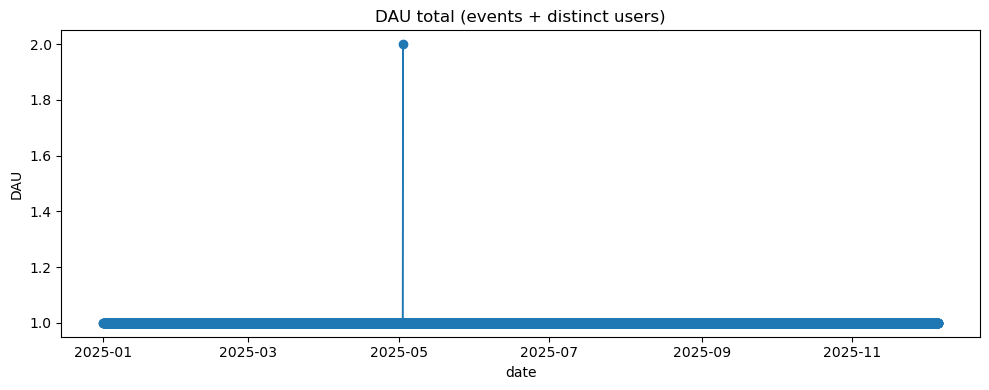

In [182]:
if 'dau_total' in dau.columns:
    plt.figure(figsize=(10,4))
    plt.plot(pd.to_datetime(dau['event_date']), dau['dau_total'], marker='o', linewidth=1)
    plt.title('DAU total (events + distinct users)')
    plt.xlabel('date')
    plt.ylabel('DAU')
    plt.tight_layout()
    plt.show()




In [183]:
emp_length_counts = customer_df['emp_length'].value_counts(dropna=False)
display(emp_length_counts)

home_ownership_counts = customer_df['home_ownership'].value_counts(dropna=False)
display(home_ownership_counts)


n/a    12
Name: emp_length, dtype: int64

MORTGAGE    8
OWN         3
RENT        1
Name: home_ownership, dtype: int64

In [184]:
state_income = customer_df.groupby('addr_state')['annual_inc'].median().sort_values(ascending=False)
display(state_income.head(10))


addr_state
MA    42000.0
Name: annual_inc, dtype: float64

In [185]:
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print("All CSV files in current folder:")
for f in csv_files:
    print(f)


All CSV files in current folder:
churn.csv
churn_platform_usage.csv
churn_summary_age_bin.csv
churn_summary_android_user.csv
churn_summary_app_web_user.csv
churn_summary_credit_bucket.csv
churn_summary_housing.csv
churn_summary_ios_user.csv
churn_summary_is_referred.csv
churn_summary_overall.csv
churn_summary_payment_type.csv
churn_summary_web_user.csv
churn_summary_zodiac_sign.csv
cohort_retention.csv
cohort_retention_old.csv
dau_by_date.csv
dau_daily.csv
digital_wallet_retention_weekly.csv
dw_user_eng.csv
dw_user_eng_with_churn_candidates.csv
fu_user_eng.csv
kpis_summary.csv
kpis_summary_extended.csv
loan_aggregate_summary.csv
loan_by_purpose.csv
loan_by_status.csv
mau_monthly.csv
monthly_event_count.csv
platform_summary.csv
predictive_modelling_csv.csv


In [186]:
if 'dau' in globals():
    dau.to_csv('dau_daily.csv', index=False)
    print("dau_daily.csv exported")
else:
    print("DAU DataFrame not found. Compute DAU first.")

if 'mau' in globals():
    mau.to_csv('mau_monthly.csv', index=False)
    print("mau_monthly.csv exported")
else:
    print("MAU DataFrame not found. Compute MAU first.")


dau_daily.csv exported
mau_monthly.csv exported


In [187]:
power_bi_files = [
    'kpis_summary_extended.csv',
    'dau_daily.csv',
    'mau_monthly.csv',
    'digital_wallet_retention_weekly.csv',
    'churn_by_reg_month.csv'
]

print("Power BI files available in directory:")
for f in power_bi_files:
    if os.path.exists(f):
        print(f"{f} exists")
    else:
        print(f"{f} missing")


Power BI files available in directory:
kpis_summary_extended.csv exists
dau_daily.csv exists
mau_monthly.csv exists
digital_wallet_retention_weekly.csv exists
churn_by_reg_month.csv missing


In [188]:
import pandas as pd

for f in power_bi_files:
    if os.path.exists(f):
        print(f"\nPreview of {f}:")
        display(pd.read_csv(f).head(5))




Preview of kpis_summary_extended.csv:


,total_users,overall_churn_rate,median_transactions_per_user,median_total_spent,total_loans,total_loan_amount,avg_tx_per_active_day,median_app_usage_freq_per_month,avg_loan_amount,median_loan_amount
0,16247,0.436881,506.0,3.756105e+06,270299,4166072400,2.755357,NaN,15412.829496,13200.0



Preview of dau_daily.csv:


,event_date,dau_users,dau_events,dau_total
0,2025-01-01 00:15:17,1,0.0,1.0
1,2025-01-01 01:08:58,1,0.0,1.0
2,2025-01-01 05:27:55,1,0.0,1.0
3,2025-01-01 08:15:25,1,0.0,1.0
4,2025-01-01 12:06:25,1,0.0,1.0



Preview of mau_monthly.csv:


,period_month,mau_users
0,2025-01,618
1,2025-02,578
2,2025-03,642
3,2025-04,608
4,2025-05,626



Preview of digital_wallet_retention_weekly.csv:


,cohort_week,0
0,2024-12-09,1.0
1,2024-12-16,1.0
2,2024-12-23,1.0
3,2024-12-30,1.0
4,2025-01-06,1.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              12 non-null     object 
 1   emp_title            12 non-null     object 
 2   emp_length           12 non-null     object 
 3   home_ownership       12 non-null     object 
 4   annual_inc           12 non-null     float64
 5   annual_inc_joint     12 non-null     float64
 6   verification_status  12 non-null     object 
 7   zip_code             12 non-null     object 
 8   addr_state           12 non-null     object 
 9   avg_cur_bal          12 non-null     float64
 10  Tot_cur_bal          12 non-null     float64
 11  customer_id          12 non-null     object 
dtypes: float64(4), object(8)
memory usage: 1.2+ KB
None

Dataset description (numeric columns):
          annual_inc  annual_inc_joint   avg_cur_bal    Tot_cur_bal
count      12.000

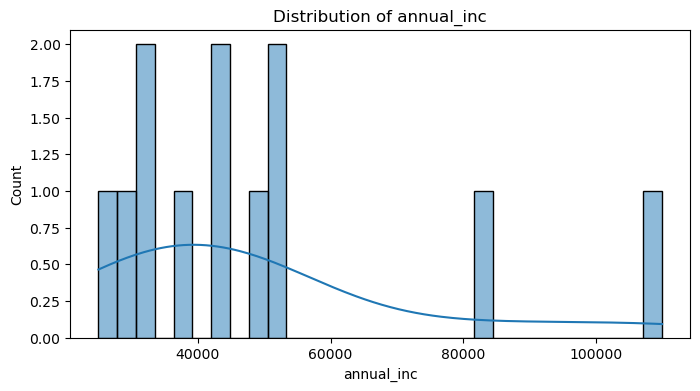


Summary stats for annual_inc_joint:
count        12.000000
mean     108177.303333
std       52885.675183
min       49331.640000
25%       78500.000000
50%      102000.000000
75%      123500.000000
max      248000.000000
Name: annual_inc_joint, dtype: float64


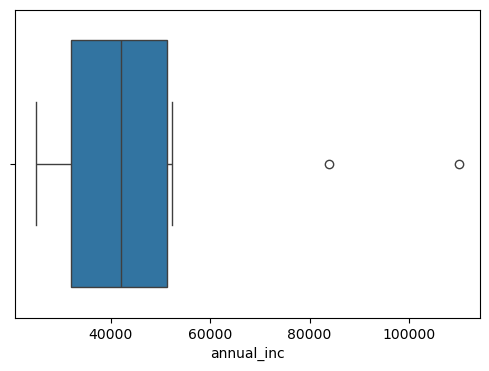

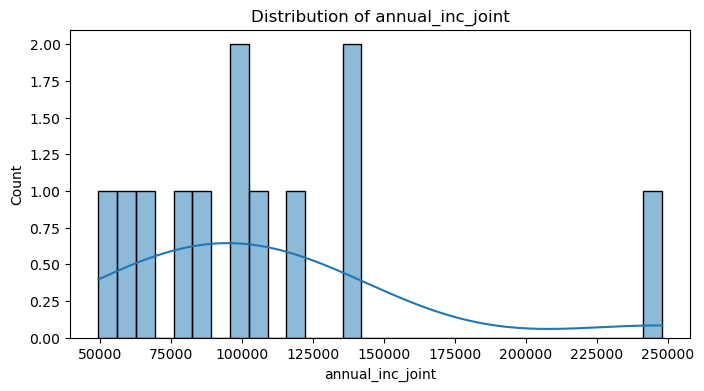


Summary stats for avg_cur_bal:
count       12.000000
mean     10674.250000
std      10666.099245
min          8.000000
25%       2175.250000
50%       7925.500000
75%      16194.250000
max      34657.000000
Name: avg_cur_bal, dtype: float64


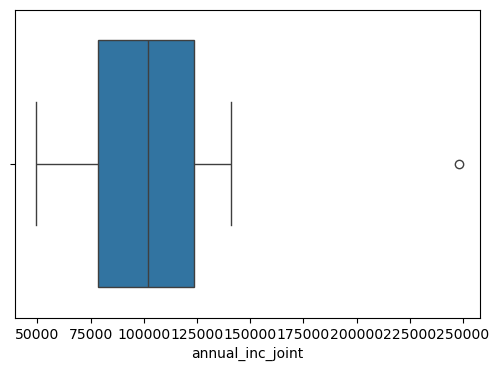

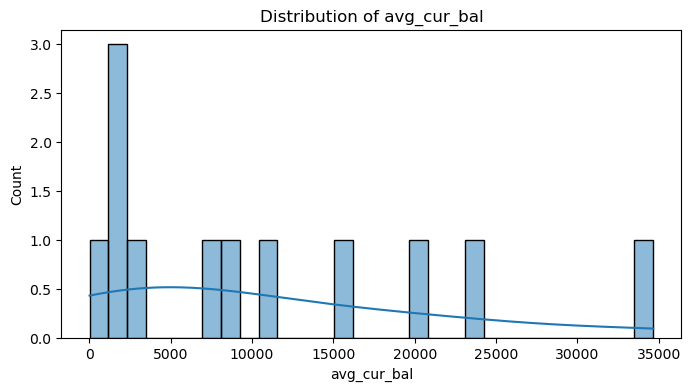


Summary stats for Tot_cur_bal:
count        12.000000
mean     103256.916667
std       94655.962092
min          30.000000
25%       24991.000000
50%       68456.000000
75%      208341.250000
max      240631.000000
Name: Tot_cur_bal, dtype: float64


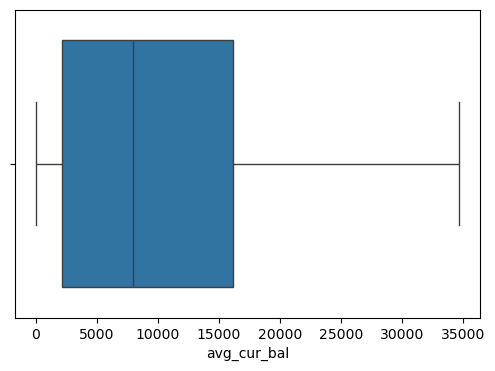

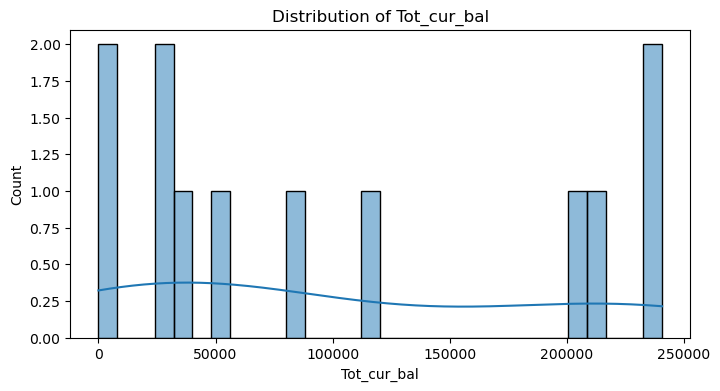

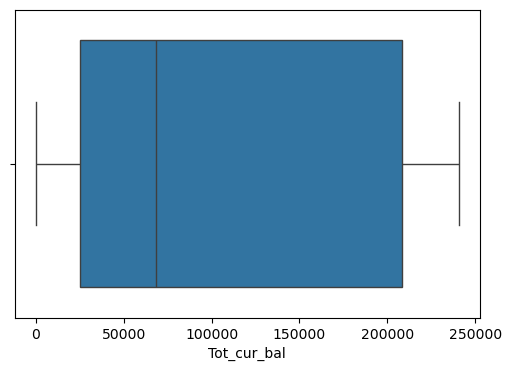

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("\nDataset info:")
print(customer_df.info())

print("\nDataset description (numeric columns):")
print(customer_df.describe())

print("\nFirst 5 rows:")
print(customer_df.head())


numeric_cols = ['annual_inc', 'annual_inc_joint', 'avg_cur_bal', 'Tot_cur_bal']

for col in numeric_cols:
    if col in customer_df.columns:
        print(f"\nSummary stats for {col}:")
        print(customer_df[col].describe())
        
        # Histogram
        plt.figure(figsize=(8,4))
        sns.histplot(customer_df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
        
        # Boxplot
        plt.figure(figsize=(6,4))
        sns.boxplot(x=customer_df[col])




In [190]:
print("Columns in fintech_user_df:")
print(list(fintech_user_df.columns))


Columns in fintech_user_df:
['user_id', 'churn', 'age', 'housing', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred', 'churn_flag', 'age_bin', 'credit_bucket']


Sample data:
      user_id  Total_Transactions  Avg_Transaction_Value   Total_Spent  \
0  cust_0000                 192            16736.38402  3.213386e+06   
1  cust_0001                 979            14536.73468  1.423146e+07   
2  cust_0002                 329             7061.37280  2.323192e+06   
3  cust_0003                  71            16426.87645  1.166308e+06   
4  cust_0004                 878            10800.09266  9.482481e+06   

   Active_Days Preferred_Payment_Method  Churn  
0          140               Debit Card      0  
1          229                      UPI      0  
2           73               Debit Card      1  
3          299           Wallet Balance      0  
4          236                      UPI      0  
=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1046
           1       0.94      1.00      0.97       354

    accuracy                           0.98      1400
   macr

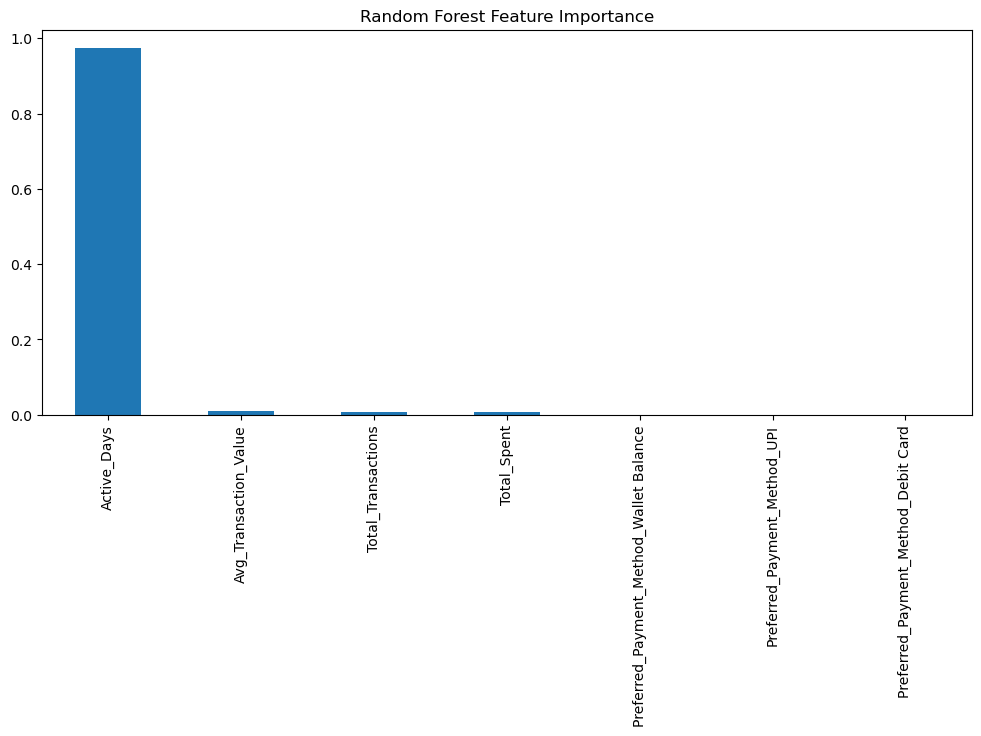

In [191]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


file_path = r'C:\Users\lee\Music\predictive_modelling_csv.csv'
df = pd.read_csv(file_path)

print("Sample data:\n", df.head())


numeric_features = ['Total_Transactions', 'Avg_Transaction_Value', 'Total_Spent', 'Active_Days']
categorical_features = ['Preferred_Payment_Method']

X = df[numeric_features + categorical_features]
y = df['Churn']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

logreg_pipeline.fit(X_train, y_train)

y_pred_log = logreg_pipeline.predict(X_test)
y_prob_log = logreg_pipeline.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


rf_features_num = numeric_features

ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
rf_features_cat = ohe.get_feature_names_out(categorical_features)

rf_features = list(rf_features_num) + list(rf_features_cat)

feat_importances = pd.Series(rf_pipeline.named_steps['classifier'].feature_importances_, index=rf_features)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title='Random Forest Feature Importance')
plt.show()

